```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖 

In [1]:
# - 矩阵运算
import numpy as np
# - 图像处理
import cv2 
# - 绘图可视化
from matplotlib import pyplot as plt

# 自定义库
# 从阿凯机器人工具箱导入Gemini335类
from kyle_robot_toolbox.camera import Gemini335

pybullet build time: Jun  3 2022 02:05:55


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux


In [2]:
%matplotlib inline

## 相机初始化

In [3]:
# 创建相机对象
camera = Gemini335()

[05/29 12:49:03.348360][info][12724][Context.cpp:68] Context created with config: default config!
[05/29 12:49:03.348384][info][12724][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/deepsense-gemini335/04.Gemini335-3D相机案例源码/basic-example, SDK version=v1.10.5-20240511-7dc8be9
[05/29 12:49:03.348400][info][12724][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/29 12:49:03.512469][info][12724][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/29 12:49:03.512493][info][12724][DeviceManager.cpp:15] Current found device(s): (1)
[05/29 12:49:03.512499][info][12724][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/29 12:49:03.983322][error][12724][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/29 12:49:03.985158][error][12724][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 获取彩图

In [4]:
# 采集彩图, 色彩空间BGR
img_bgr = camera.read_color_img() 

## 显示彩图

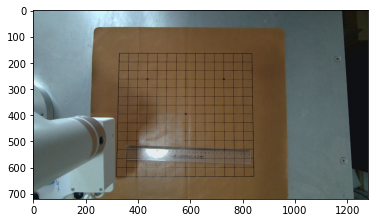

In [5]:
# 显示画面
# 将图像从BGR空间转换为RGB空间
plt.imshow(img_bgr[:, :, ::-1])

## 图像移除畸变

注意事项: Gemini2认为没有畸变，去除前后图像是一致的

In [6]:
# 图像移除畸变
img_bgr_undistor = camera.remove_distortion(img_bgr)

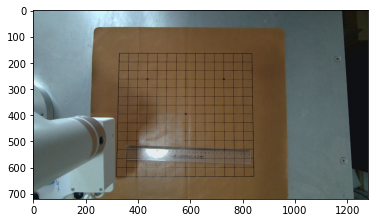

In [7]:
# 显示去除畸变的彩图 
plt.imshow(img_bgr_undistor[:, :, ::-1])

## 保存图像

保存原始彩图

In [8]:
# 图像保存路径
img_path = "data/read_color_image/demo.png"
# 图像保存
ret = cv2.imwrite(img_path, img_bgr)
# 输出日志
if ret:
    print("图像保存成功")
else:
    print("检查图像保存路径是否存在，且路径不可以有中文。")

图像保存成功


保存去除畸变后的彩图

In [9]:
# 图像保存路径
img_path = "data/read_color_image/demo_undistor.png"
# 图像保存
ret = cv2.imwrite(img_path, img_bgr_undistor)
# 输出日志
if ret:
    print("图像保存成功")
else:
    print("检查图像保存路径是否存在，且路径不可以有中文。")

图像保存成功


## 读取彩图

In [10]:
# 图像保存路径
img_path = "data/read_color_image/demo.png"
# 图像载入
img_bgr2 = cv2.imread(img_path)

if img_bgr2 is None:
    print("图像读取失败")
else:
    print("图片读取成功")

图片读取成功


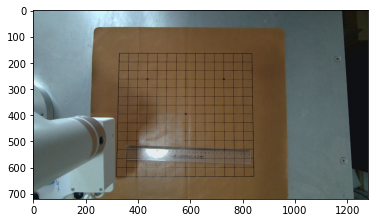

In [11]:
# 显示从文件里读取的彩图
plt.imshow(img_bgr2[:, :, ::-1])